# 432 Project - Fall 2020

#### Student Names:
#### Firas Sawan       ID#26487815 
#### Giselle Martel    ID#26352936

# FakeNewsClassifiers

##### A comparison between different Machine Learning models in predicting which news articles are "Fake News" or "Real News"

In [1]:
import tools as tools
import preprocess as preprocess
import model.logistic_regression as LR
import model.decision_tree as DT
import model.random_forest as RF
import model.support_vector_machine as SVC
import model.naive_bayesian_classifier as NB

import pandas as pd
import numpy as np


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gisellemartel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gisellemartel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
print("\nPreprocessing of data...\n")

# read dataset from csv files
fake_news = preprocess.parse_dataset("Fake.csv", "FAKE")
real_news = preprocess.parse_dataset("True.csv", "REAL")

print()

# join all news (fake + real) data
all_news = pd.concat([fake_news, real_news], axis=0)

# tokenize each dataset
fake_news_all_tokens, fake_news_tokens_per_article = preprocess.tokenize(fake_news, "fake_news")
real_news_all_tokens, real_news_tokens_per_article = preprocess.tokenize(real_news, "real_news")

print()

# join tokens (fake + real)
all_tokens = fake_news_all_tokens + real_news_all_tokens
tokens_per_article = fake_news_tokens_per_article + real_news_tokens_per_article

print()

# Split and preprocess the data into training and testing data
X_train, X_test, y_train, y_test = preprocess.split_and_preprocess(all_tokens,tokens_per_article, all_news)

%store X_train
%store X_test
%store y_train
%store y_test


Preprocessing of data...

Parsing news dataset from file: Fake.csv
Setting label for news dataset: FAKE
Parsing news dataset from file: True.csv
Setting label for news dataset: REAL

Tokenizing fake_news dataset, this may take a few minutes...
Tokenizing real_news dataset, this may take a few minutes...


Splitting data: 70% training, 30% testing
Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'y_train' (DataFrame)
Stored 'y_test' (DataFrame)



Testing Logistic Regression Classifier ...

Fitting data to LogisticRegression Classifier, this may take a while...
52.3% training accuracy for C=0.000
Fitting data to LogisticRegression Classifier, this may take a while...
93.3% training accuracy for C=0.004
Fitting data to LogisticRegression Classifier, this may take a while...
97.1% training accuracy for C=0.158
Fitting data to LogisticRegression Classifier, this may take a while...
98.9% training accuracy for C=6.310
Fitting data to LogisticRegression Classifier, this may take a while...
99.4% training accuracy for C=251.189
Fitting data to LogisticRegression Classifier, this may take a while...
99.4% training accuracy for C=10000.000

Logistic Regression overfitting: 0.013

Best LogisticRegression estimator accuracy: 99.385%
Hyperparams:
C: 10000.0

Printing metrics...
mean squared error: 9.559%
accuracy: 99.086%
recall: 99.105%
precision: 99.147%
f1: 99.126%
jacccard: 98.267%

Plotting confusion matrix for LogisticRegression Cla

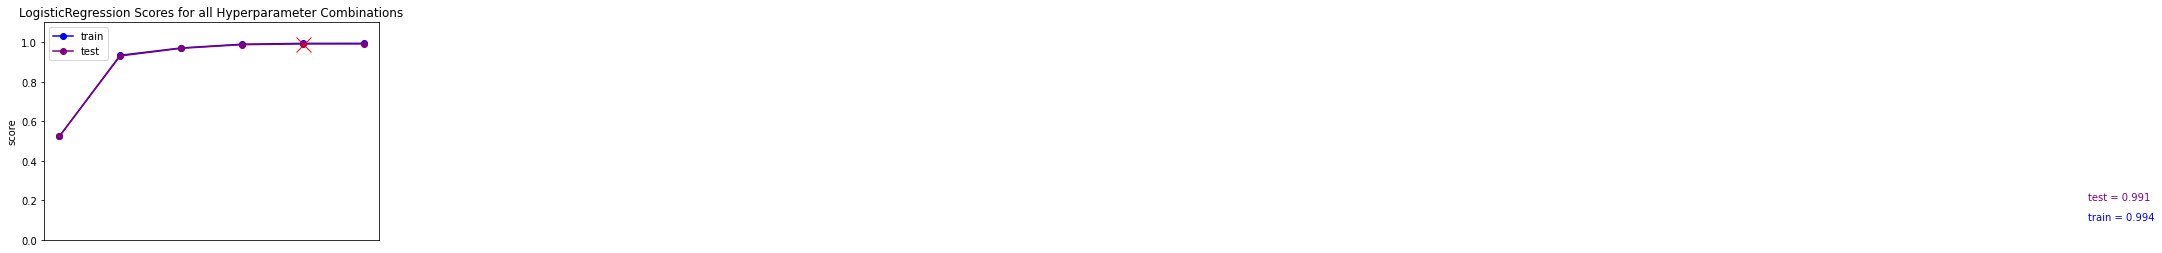

<Figure size 432x288 with 0 Axes>

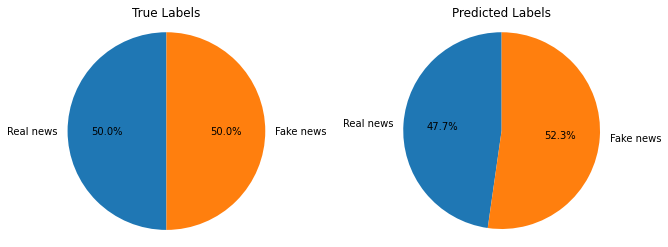

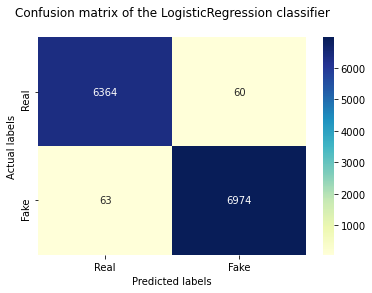

In [4]:
# Logisitic Regression Classifier
print("\nTesting Logistic Regression Classifier ...\n")

# set the hyperparams
C = np.logspace(-4,4,6)

# perform hyperparam search
estimators, accuracy, best_estimator, hyperparams = LR.logisitic_regression_hyperparam_search(X_train, y_train, C)

# calculate the training and testing scores and plot the result
trn_scores, test_scores = tools.calculate_estimator_scores([X_train, X_test, y_train, y_test], estimators)

# calculate model overfitting
overfitting = tools.determine_overfitting(trn_scores,test_scores)
print("\nLogistic Regression overfitting: {:.3f}\n".format(overfitting))

# plot the scores of each estimator
tools.plot_estimator_scores("LogisticRegression",trn_scores,test_scores)

# display details of best estimator
tools.display_best_estimator(accuracy, "LogisticRegression", hyperparams)

# use best estimator to make predictions
y_pred = LR.logistic_regression_predict(best_estimator, X_test)

tools.plot_predicted_labels(y_test, y_pred, "LogisticRegression")
tools.display_prediction_scores(y_test,y_pred)
tools.plot_confusion_matrix(y_test,y_pred,"LogisticRegression")



Testing Decision Tree Classifier ...

Fitting data to DecisionTree, this may take a while...
99.3% training accuracy for max_depth=1.000
Fitting data to DecisionTree, this may take a while...
99.8% training accuracy for max_depth=9.500
Fitting data to DecisionTree, this may take a while...
100.0% training accuracy for max_depth=18.000

Decision Tree overfitting: 0.011

Best DecisionTree estimator accuracy: 99.968%
Hyperparams:
D: 18.0

Printing metrics...
mean squared error: 8.401%
accuracy: 99.294%
recall: 99.403%
precision: 99.248%
f1: 99.326%
jacccard: 98.660%

Plotting confusion matrix for DecisionTree Classifier...


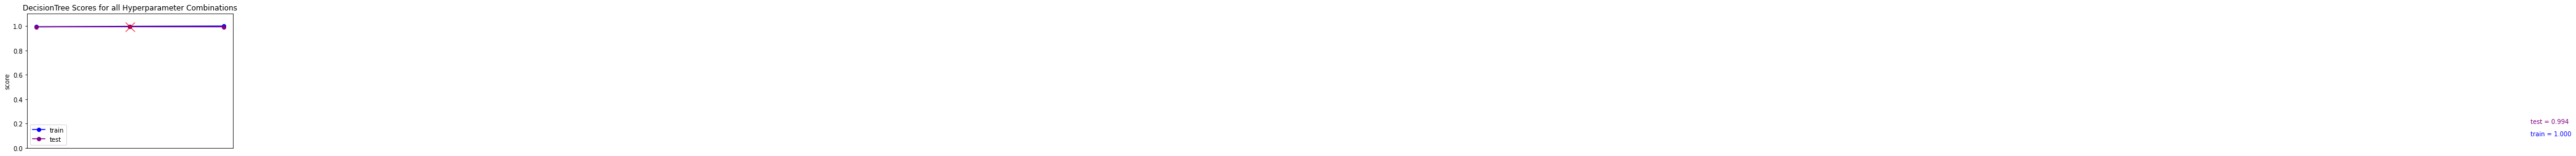

<Figure size 432x288 with 0 Axes>

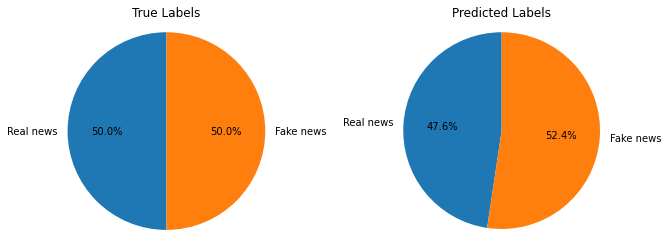

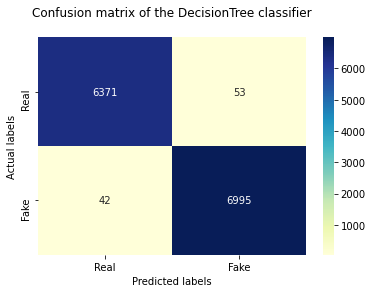

In [13]:
print("\nTesting Decision Tree Classifier ...\n")

# set the hyperparams
D = np.linspace(1,18,3)

# perform hyperparam search
estimators, accuracy, best_estimator, hyperparams = DT.decision_tree_hyperparam_search(X_train, y_train, D)

# calculate the training and testing scores and plot the result
trn_scores, test_scores = tools.calculate_estimator_scores([X_train, X_test, y_train, y_test], estimators)

# calculate model overfitting
overfitting = tools.determine_overfitting(trn_scores,test_scores)
print("\nDecision Tree overfitting: {:.3f}\n".format(overfitting))

# plot the scores of each estimator
tools.plot_estimator_scores("DecisionTree",trn_scores,test_scores)

# display details of best estimator
tools.display_best_estimator(accuracy, "DecisionTree", hyperparams)

# use best estimator to make predictions
y_pred = DT.decision_tree_predict(best_estimator, X_test)

tools.plot_predicted_labels(y_test, y_pred, "DecisionTree")
tools.display_prediction_scores(y_test,y_pred)
tools.plot_confusion_matrix(y_test,y_pred,"DecisionTree")

In [ ]:
# Random Forest Classifer
print("\nTesting Random Forest Classifier ...\n")

# set the hyperparams
D = np.linspace(1,1000,20)
N = np.linspace(1,10,1, dtype="int32")

# perform hyperparam search
estimators, accuracy, best_estimator, hyperparams = RF.random_forest_hyperparam_search(X_train, y_train, D, N)

# calculate the training and testing scores and plot the result
trn_scores, test_scores = tools.calculate_estimator_scores([X_train, X_test, y_train, y_test], estimators)

# calculate model overfitting
overfitting = tools.determine_overfitting(trn_scores,test_scores)
print("\nRandom Forest overfitting: {:.3f}\n".format(overfitting))

# plot the scores of each estimator
tools.plot_estimator_scores("RandomForest",trn_scores,test_scores)

# display details of best estimator
tools.display_best_estimator(accuracy, "RandomForest", hyperparams)

# use best estimator to make predictions
y_pred = RF.random_forest_predict(best_estimator, X_test)

tools.plot_predicted_labels(y_test, y_pred, "RandomForest")
tools.display_prediction_scores(y_test,y_pred)
tools.plot_confusion_matrix(y_test,y_pred,"RandomForest")

tools.display_result(best_estimator, X_train)

In [ ]:
# Support Vector Classification
print("\nTesting SVM Classifier ...\n")

# set the hyperparams
C = np.logspace(-4,4,6)
G = np.logspace(-4,4,6)
K = ["rbf", "linear"]

# perform hyperparam search
estimators, accuracy, best_estimator, hyperparams = SVC.svc_hyperparam_search(X_train, y_train, C, G, K)

# calculate the training and testing scores and plot the result
trn_scores, test_scores = tools.calculate_estimator_scores([X_train, X_test, y_train, y_test], estimators)

# calculate model overfitting
overfitting = tools.determine_overfitting(trn_scores,test_scores)
print("\nSVC overfitting: {:.3f}\n".format(overfitting))

# plot the scores of each estimator
tools.plot_estimator_scores("SVC",trn_scores,test_scores)

# display details of best estimator
tools.display_best_estimator(accuracy, "SVC", hyperparams)

# use best estimator to make predictions
y_pred = SVC.support_vector_machine_predict(best_estimator, X_test)

tools.plot_predicted_labels(y_test, y_pred, "SVC")
tools.display_prediction_scores(y_test,y_pred)
tools.plot_confusion_matrix(y_test,y_pred,"SVC")

tools.display_result(best_estimator, X_train)



In [ ]:
# Naive Bayes Classifier
print("\nTesting Naive Bayesian Classifier ...\n")

# set the hyperparams
A = np.linspace(0.05,1,12)
F = [True, False]

# perform hyperparam search
estimators, accuracy, best_estimator, hyperparams = NB.naive_bayes_hyperparam_search(X_train, y_train, A,F)

# calculate the training and testing scores and plot the result
trn_scores, test_scores = tools.calculate_estimator_scores([X_train, X_test, y_train, y_test], estimators)

# calculate model overfitting
overfitting = tools.determine_overfitting(trn_scores,test_scores)
print("\nNaive Bayes overfitting: {:.3f}\n".format(overfitting))

# plot the scores of each estimator
tools.plot_estimator_scores("NaiveBayes",trn_scores,test_scores)

# display details of best estimator
tools.display_best_estimator(accuracy, "NaiveBayes", hyperparams)

# use best estimator to make predictions
y_pred = NB.naive_bayesian_predict(best_estimator, X_test)

tools.plot_predicted_labels(y_test, y_pred, "NaiveBayes")
tools.display_prediction_scores(y_test,y_pred)
tools.plot_confusion_matrix(y_test,y_pred,"NaiveBayes")

tools.display_result(best_estimator, X_train)